<a href="https://colab.research.google.com/github/Gerandi/LSTM-DAX40/blob/main/Final_DAX40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [1]:
# Install packages
%pip install numpy pandas tensorflow keras matplotlib seaborn plotly

In [2]:
#Import Libraries

import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random
import os

In [3]:
# Set a global seed value
SEED = 20

# Set seed for Python's built-in random module
random.seed(SEED)

# Set seed for NumPy
np.random.seed(SEED)

# Set seed for TensorFlow
tf.random.set_seed(SEED)

# Set seed for GPU operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)

# Set seed for Keras
tf.keras.utils.set_random_seed(SEED)

print("Random seeds have been set for reproducibility.")

Random seeds have been set for reproducibility.


In [4]:
import yfinance as yf

# DAX 40 companies information
dax40_info = {
    'Adidas': {'sector': 'Apparel', 'ticker': 'ADS.DE'},
    'Airbus': {'sector': 'Aerospace & Defence', 'ticker': 'AIR.DE'},
    'Allianz': {'sector': 'Financial Services', 'ticker': 'ALV.DE'},
    'BASF': {'sector': 'Chemicals', 'ticker': 'BAS.DE'},
    'Bayer': {'sector': 'Pharmaceuticals', 'ticker': 'BAYN.DE'},
    'Beiersdorf': {'sector': 'Consumer goods', 'ticker': 'BEI.DE'},
    'BMW': {'sector': 'Automotive', 'ticker': 'BMW.DE'},
    'Brenntag': {'sector': 'Distribution', 'ticker': 'BNR.DE'},
    'Commerzbank': {'sector': 'Financial Services', 'ticker': 'CBK.DE'},
    'Continental': {'sector': 'Automotive', 'ticker': 'CON.DE'},
    'Covestro': {'sector': 'Chemicals', 'ticker': '1COV.DE'},
    'Daimler Truck': {'sector': 'Automotive', 'ticker': 'DTG.DE'},
    'Deutsche Bank': {'sector': 'Financial Services', 'ticker': 'DBK.DE'},
    'Deutsche Börse': {'sector': 'Financial Services', 'ticker': 'DB1.DE'},
    'Deutsche Post': {'sector': 'Logistics', 'ticker': 'DHL.DE'},
    'Deutsche Telekom': {'sector': 'Telecommunication', 'ticker': 'DTE.DE'},
    'E.ON': {'sector': 'Utilities', 'ticker': 'EOAN.DE'},
    'Fresenius': {'sector': 'Healthcare', 'ticker': 'FRE.DE'},
    'Hannover Re': {'sector': 'Insurance', 'ticker': 'HNR1.DE'},
    'Heidelberg Materials': {'sector': 'Construction Materials', 'ticker': 'HEI.DE'},
    'Henkel': {'sector': 'Consumer Goods', 'ticker': 'HEN3.DE'},
    'Infineon Technologies': {'sector': 'Technology', 'ticker': 'IFX.DE'},
    'Mercedes-Benz Group': {'sector': 'Automotive', 'ticker': 'MBG.DE'},
    'Merck': {'sector': 'Pharmaceuticals', 'ticker': 'MRK.DE'},
    'MTU Aero Engines': {'sector': 'Aerospace & Defence', 'ticker': 'MTX.DE'},
    'Munich Re': {'sector': 'Financial Services', 'ticker': 'MUV2.DE'},
    'Porsche': {'sector': 'Automotive', 'ticker': 'P911.DE'},
    'Porsche SE': {'sector': 'Automotive', 'ticker': 'PAH3.DE'},
    'Qiagen': {'sector': 'Biotech', 'ticker': 'QIA.DE'},
    'Rheinmetall': {'sector': 'Aerospace & Defence', 'ticker': 'RHM.DE'},
    'RWE': {'sector': 'Utilities', 'ticker': 'RWE.DE'},
    'SAP': {'sector': 'Technology', 'ticker': 'SAP.DE'},
    'Sartorius': {'sector': 'Medical Technology', 'ticker': 'SRT3.DE'},
    'Siemens': {'sector': 'Industrials', 'ticker': 'SIE.DE'},
    'Siemens Energy': {'sector': 'Energy technology', 'ticker': 'ENR.DE'},
    'Siemens Healthineers': {'sector': 'Medical Equipment', 'ticker': 'SHL.DE'},
    'Symrise': {'sector': 'Chemicals', 'ticker': 'SY1.DE'},
    'Volkswagen Group': {'sector': 'Automotive', 'ticker': 'VOW3.DE'},
    'Vonovia': {'sector': 'Real Estate', 'ticker': 'VNA.DE'},
    'Zalando': {'sector': 'E-Commerce', 'ticker': 'ZAL.DE'}
}

tickers = [stock['ticker'] for stock in dax40_info.values()]

# Data

In [5]:
start_date = "2020-06-01"
end_date = "2024-06-01"

data = yf.download(tickers, start=start_date, end=end_date)
stocks_df = data['Close']

# Select a random ticker
rand_ticker = random.choice(tickers)


[*********************100%%**********************]  40 of 40 completed


In [6]:
# Create a line plot using Plotly Express
fig = px.line(stocks_df, x=stocks_df.index, y=stocks_df.iloc[:, 0], title='Asset Value Chart', labels={'x': 'Date', 'y': rand_ticker})
fig.show()

Daily Returns

In [7]:
returns_df = stocks_df.pct_change().dropna()
returns_df = returns_df.ffill()
returns_df.head()

Ticker,1COV.DE,ADS.DE,AIR.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,BNR.DE,CBK.DE,...,RHM.DE,RWE.DE,SAP.DE,SHL.DE,SIE.DE,SRT3.DE,SY1.DE,VNA.DE,VOW3.DE,ZAL.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-03,0.032837,0.001009,0.003712,-0.001607,0.033838,0.011389,-0.025062,0.010573,0.016351,-0.006265,...,0.020860,0.019053,0.008203,0.014002,-0.002767,0.054046,-0.006471,0.023413,0.000316,0.008403
2022-10-04,0.048836,0.060504,0.061526,0.035038,0.033219,0.014388,0.024690,0.029973,0.037855,0.047971,...,-0.044582,0.030382,0.043627,0.034521,0.053508,0.076780,0.028056,0.000440,0.038754,0.082843
2022-10-05,-0.014687,-0.026941,-0.014253,-0.006459,-0.009102,0.000103,0.001487,-0.018943,-0.015502,-0.038451,...,-0.006481,0.010837,-0.014349,-0.019376,-0.019564,-0.034296,0.002437,-0.046614,-0.013096,-0.052512
2022-10-06,-0.006660,-0.007655,-0.002785,-0.007103,-0.015388,-0.019424,0.003465,0.006996,-0.013893,-0.000272,...,-0.015003,-0.025929,0.009858,-0.001317,0.008634,0.021972,-0.009723,-0.012454,0.021293,0.032011
2022-10-07,-0.018519,-0.051699,-0.008592,-0.003880,-0.013933,-0.005974,-0.002960,-0.003752,-0.029117,0.004082,...,0.023510,0.000512,-0.015550,-0.015388,-0.023588,-0.048250,-0.018164,-0.037366,-0.015863,-0.044907


In [8]:
fig = px.imshow(returns_df.iloc[:,0:10].corr(), text_auto=True, aspect="auto", title='Correlation Heatmap')
fig.show()

In [9]:
fig = px.line(returns_df, x=returns_df.index, y='SAP.DE', title='Daily profitability of <span style="color:#006BB8">SAP</span>', labels={'x': 'Date', 'y': 'Profitability'})
fig.update_traces(line=dict(color='#006BB8'))
fig.show()

In [10]:
fig = px.line(returns_df, x=returns_df.index, y='SIE.DE', title='Daily profitability of <span style="color:#009999">Siemens</span>', labels={'x': 'Date', 'y': 'Profitability'})
fig.update_traces(line=dict(color='#009999'))
fig.show()

In [11]:
fig = px.line(returns_df, x=returns_df.index, y='DTE.DE', title='Daily profitability of <span style="color:#E20074">Deutsche Telekom</span>', labels={'x': 'Date', 'y': 'Profitability'})
fig.update_traces(line=dict(color='#E20074'))
fig.show()

In [12]:
n = len(returns_df)
# Split the data
train_data = returns_df[:int(0.7*len(returns_df))]
val_data = returns_df[int(0.7*len(returns_df)):int(0.9*len(returns_df))]
test_data = returns_df[int(0.9*len(returns_df)):]

In [13]:
train_data.shape, val_data.shape, test_data.shape

((297, 40), (85, 40), (43, 40))

# Function for building data windows

In [14]:
class WindowCreate:
    def __init__(self, size, train=train_data, val=val_data, test=test_data):
        self.size = size
        self.train = train
        self.val = val
        self.test = test
        self.labels_size = 1
        self.win_size = size + self.labels_size
        self.stock_index = {stock: i for i, stock in enumerate(train.columns)}

        self.data_sl = slice(0, size)
        self.in_indexes = np.arange(self.win_size)[self.data_sl]
        self.label_sl = slice(self.labels_size, None)
        self.label_indexes = np.arange(self.win_size)[self.label_sl]

    def set_win(self, data):
        in_data = data[:, self.data_sl, :]
        label = data[:, self.label_sl, :]
        in_data.set_shape([None, self.size, None])
        label.set_shape([None, self.size, None])
        return in_data, label

    def dataset(self, input):
        input_data = np.array(input)
        dataset = tf.keras.utils.timeseries_dataset_from_array(
            data=input_data,
            targets=None,
            sequence_length=self.win_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=8)
        dataset = dataset.map(self.set_win)
        return dataset

    def plot(self, model=None, ticker=tickers[0]):
        ticker_index = self.stock_index[ticker]
        for a in range(3):
            image = self.example[a]
            in_data, labels = image[0], image[1]
            plt.subplot(3, 1, a+1)
            if a==0:
                plt.ylabel(ticker+' [training set]')
            elif a==1:
                plt.ylabel(ticker+' [validation set]')
            elif a==2:
                plt.ylabel(ticker+' [test set]')
            plt.plot(self.in_indexes, in_data[0, :, ticker_index],
                    label='Input data', marker='.', color = 'darkmagenta', zorder=-10)

            plt.scatter(self.label_indexes, labels[0, :, ticker_index],
                        edgecolors='navy', label='Labels', c='slateblue', s=50)
            if model is not None:
                pred = model(in_data)
                plt.scatter(self.label_indexes, pred[0, :, ticker_index],
                            marker='X', edgecolors='darkred', label='Prediction',
                            c='crimson', s=50)

            if a == 0:
                plt.legend()
            plt.xticks(np.arange(0, self.size+1, step=1))
        plt.xlabel('Day')

    @property
    def train_ds(self):
        return self.dataset(self.train)

    @property
    def val_ds(self):
        return self.dataset(self.val)

    @property
    def test_ds(self):
        return self.dataset(self.test)

    @property
    def example(self):
        train = next(iter(self.train_ds))
        val = next(iter(self.val_ds))
        test = next(iter(self.test_ds))
        result = [[tf.reshape(train[0][-1], [1, self.size, len(self.stock_index)])]+[tf.reshape(train[1][-1], [1, self.size,len(self.stock_index)])]] \
                                                                      + [[tf.reshape(val[0][-1], [1, self.size, len(self.stock_index)])] \
                                                                      + [tf.reshape(val[1][-1], [1, self.size, len(self.stock_index)])]] \
                                                                      + [[test[0]]+[test[1]]]
        return result

In [15]:
    @property
    def train_ds(self):
        return self.dataset(self.train)

    @property
    def val_ds(self):
        return self.dataset(self.val)

    @property
    def test_ds(self):
        return self.dataset(self.test)

    @property
    def example(self):
        train = next(iter(self.train_ds))
        val = next(iter(self.val_ds))
        test = next(iter(self.test_ds))
        result = [[tf.reshape(train[0][-1], [1, self.size, len(self.stock_index)])]+[tf.reshape(train[1][-1], [1, self.size,len(self.stock_index)])]] \
                                                                      + [[tf.reshape(val[0][-1], [1, self.size, len(self.stock_index)])] \
                                                                      + [tf.reshape(val[1][-1], [1, self.size, len(self.stock_index)])]] \
                                                                      + [[test[0]]+[test[1]]]
        return result

WindowCreate.train_ds = train_ds
WindowCreate.val_ds = val_ds
WindowCreate.test_ds = test_ds
WindowCreate.example = example

In [16]:
window1 = WindowCreate(size=5)
window2 = WindowCreate(size=10)
window3 = WindowCreate(size=15)
window4 = WindowCreate(size=30)
print("WindowCreate instances created for sizes 5, 10, 15, and 30")

WindowCreate instances created for sizes 5, 10, 15, and 30


# LSTM Models

In [17]:
def compile_and_fit(model, train_data, val_data):
    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError(),
                           tf.metrics.RootMeanSquaredError(),])

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=10,
                                                mode='auto')
    history = model.fit(train_data, epochs=100,
                        validation_data=val_data,
                        callbacks=[callback])
    return history


In [18]:
# Model 1 (5-day window)
model1 = tf.keras.models.Sequential([
    LSTM(64, return_sequences=True, input_shape=(5, stocks_df.shape[1])),
    LSTM(32, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history1 = compile_and_fit(model1, window1.train_ds, window1.val_ds)

perf_v = {}
perf = {}
perf_v['5 days'] = model1.evaluate(window1.val_ds)
perf['5 days'] = model1.evaluate(window1.test_ds, verbose=0)

Epoch 1/100
37/37 [==============================] - 14s 96ms/step - loss: 3.5543e-04 - mean_absolute_error: 0.0126 - root_mean_squared_error: 0.0189 - val_loss: 2.6544e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0163
Epoch 2/100
37/37 [==============================] - 1s 26ms/step - loss: 3.5419e-04 - mean_absolute_error: 0.0126 - root_mean_squared_error: 0.0188 - val_loss: 2.6726e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0163
Epoch 3/100
37/37 [==============================] - 1s 27ms/step - loss: 3.5238e-04 - mean_absolute_error: 0.0125 - root_mean_squared_error: 0.0188 - val_loss: 2.6680e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0163
Epoch 4/100
37/37 [==============================] - 1s 23ms/step - loss: 3.5197e-04 - mean_absolute_error: 0.0125 - root_mean_squared_error: 0.0188 - val_loss: 2.6515e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0163
Epoch 5/100
37/37 [====

In [19]:
# Model 2 (10-day window)
model2 = tf.keras.models.Sequential([
    LSTM(64, return_sequences=True, input_shape=(10, stocks_df.shape[1])),
    LSTM(32, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history2 = compile_and_fit(model2, window2.train_ds, window2.val_ds)

perf_v['10 days'] = model2.evaluate(window2.val_ds)
perf['10 days'] = model2.evaluate(window2.test_ds, verbose=0)

Epoch 1/100
36/36 [==============================] - 6s 39ms/step - loss: 3.5201e-04 - mean_absolute_error: 0.0125 - root_mean_squared_error: 0.0188 - val_loss: 2.6414e-04 - val_mean_absolute_error: 0.0109 - val_root_mean_squared_error: 0.0163
Epoch 2/100
36/36 [==============================] - 0s 13ms/step - loss: 3.4964e-04 - mean_absolute_error: 0.0125 - root_mean_squared_error: 0.0187 - val_loss: 2.6574e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0163
Epoch 3/100
36/36 [==============================] - 0s 12ms/step - loss: 3.4830e-04 - mean_absolute_error: 0.0125 - root_mean_squared_error: 0.0187 - val_loss: 2.6539e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0163
Epoch 4/100
36/36 [==============================] - 1s 15ms/step - loss: 3.4694e-04 - mean_absolute_error: 0.0124 - root_mean_squared_error: 0.0186 - val_loss: 2.6659e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0163
Epoch 5/100
36/36 [=====

In [20]:
# Model 3 (15-day window)
model3 = tf.keras.models.Sequential([
    LSTM(64, return_sequences=True),
    LSTM(32, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history3 = compile_and_fit(model3, window3.train_ds, window3.val_ds)

perf_v['15 days'] = model3.evaluate(window3.val_ds)
perf['15 days'] = model3.evaluate(window3.test_ds, verbose=0)

Epoch 1/100
36/36 [==============================] - 7s 44ms/step - loss: 3.4892e-04 - mean_absolute_error: 0.0125 - root_mean_squared_error: 0.0187 - val_loss: 2.6055e-04 - val_mean_absolute_error: 0.0109 - val_root_mean_squared_error: 0.0161
Epoch 2/100
36/36 [==============================] - 1s 20ms/step - loss: 3.4605e-04 - mean_absolute_error: 0.0124 - root_mean_squared_error: 0.0186 - val_loss: 2.6181e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0162
Epoch 3/100
36/36 [==============================] - 1s 15ms/step - loss: 3.4428e-04 - mean_absolute_error: 0.0124 - root_mean_squared_error: 0.0186 - val_loss: 2.6207e-04 - val_mean_absolute_error: 0.0109 - val_root_mean_squared_error: 0.0162
Epoch 4/100
36/36 [==============================] - 1s 16ms/step - loss: 3.4217e-04 - mean_absolute_error: 0.0124 - root_mean_squared_error: 0.0185 - val_loss: 2.6404e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0162
Epoch 5/100
36/36 [=====

In [21]:
# Model 4 (30-day window)
model4 = tf.keras.models.Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, stocks_df.shape[1])),
    LSTM(32, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history4 = compile_and_fit(model4, window4.train_ds, window4.val_ds)
perf_v['30 days'] = model4.evaluate(window4.val_ds)
perf['30 days'] = model4.evaluate(window4.test_ds, verbose=0)

Epoch 1/100
34/34 [==============================] - 7s 53ms/step - loss: 3.4106e-04 - mean_absolute_error: 0.0124 - root_mean_squared_error: 0.0185 - val_loss: 2.5104e-04 - val_mean_absolute_error: 0.0109 - val_root_mean_squared_error: 0.0158
Epoch 2/100
34/34 [==============================] - 1s 25ms/step - loss: 3.3696e-04 - mean_absolute_error: 0.0123 - root_mean_squared_error: 0.0184 - val_loss: 2.5183e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0159
Epoch 3/100
34/34 [==============================] - 1s 24ms/step - loss: 3.3372e-04 - mean_absolute_error: 0.0122 - root_mean_squared_error: 0.0183 - val_loss: 2.5296e-04 - val_mean_absolute_error: 0.0110 - val_root_mean_squared_error: 0.0159
Epoch 4/100
34/34 [==============================] - 1s 25ms/step - loss: 3.3004e-04 - mean_absolute_error: 0.0122 - root_mean_squared_error: 0.0182 - val_loss: 2.5732e-04 - val_mean_absolute_error: 0.0111 - val_root_mean_squared_error: 0.0160
Epoch 5/100
34/34 [=====

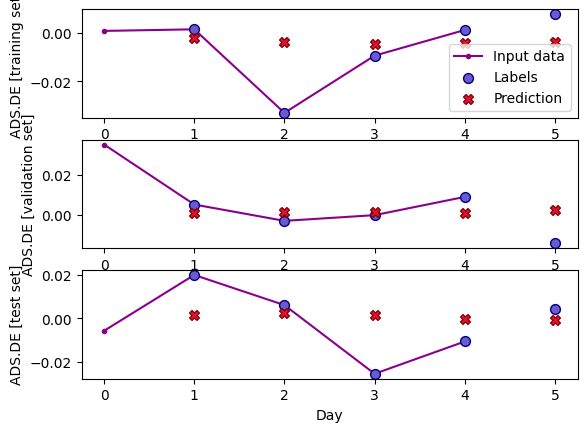

In [22]:
window1.plot(model1)

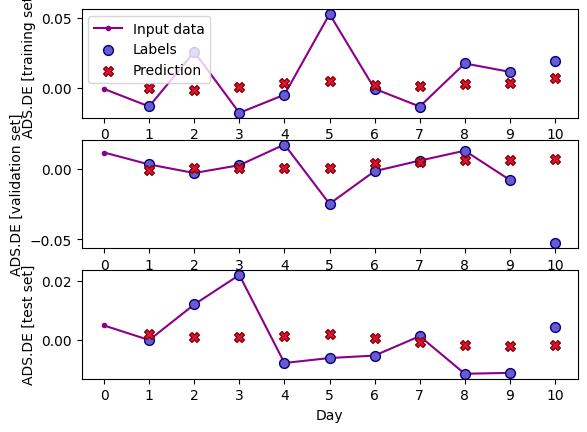

In [23]:
window2.plot(model2)

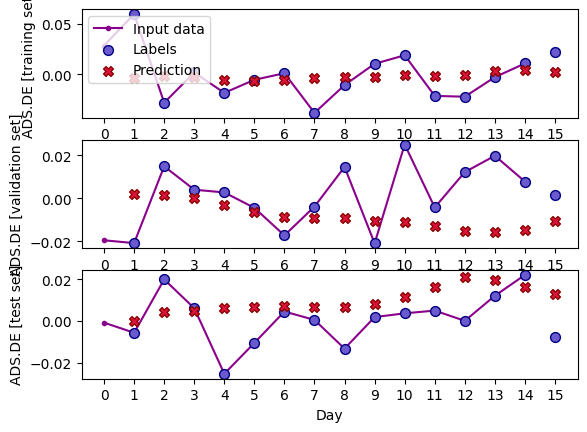

In [24]:
window3.plot(model3)

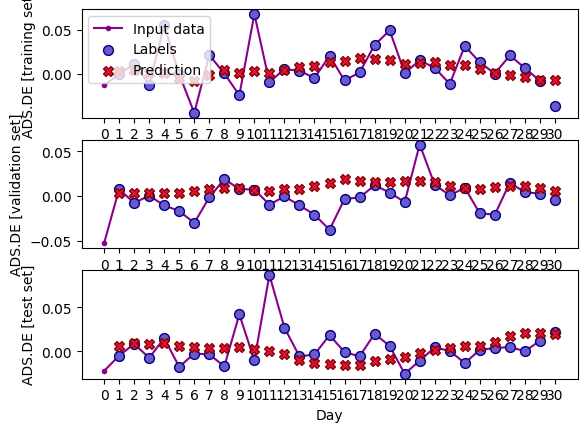

In [25]:
window4.plot(model4)

In [26]:
# Print performance metrics
print("Validation Performance:")
for key, value in perf_v.items():
    print(f"{key}: Loss = {value[0]:.4f}, MAE = {value[1]:.4f}")

print("\nTest Performance:")
for key, value in perf.items():
    print(f"{key}: Loss = {value[0]:.4f}, MAE = {value[1]:.4f}")

# Store predictions for later use
predictions = {
    5: model1.predict(window1.test_ds)[-1, -1, :],
    10: model2.predict(window2.test_ds)[-1, -1, :],
    15: model3.predict(window3.test_ds)[-1, -1, :],
    30: model4.predict(window4.test_ds)[-1, -1, :]
}

Validation Performance:
5 days: Loss = 0.0003, MAE = 0.0112
10 days: Loss = 0.0003, MAE = 0.0114
15 days: Loss = 0.0003, MAE = 0.0118
30 days: Loss = 0.0003, MAE = 0.0121

Test Performance:
5 days: Loss = 0.0003, MAE = 0.0121
10 days: Loss = 0.0003, MAE = 0.0122
15 days: Loss = 0.0003, MAE = 0.0128
30 days: Loss = 0.0003, MAE = 0.0128
2/2 [==============================] - 1s 15ms/step


In [27]:
x = np.arange(len(perf))
width = 0.2

metric_name = 'mean_absolute_error'

# Extract MAE values
mae_valid = [value[1] for value in perf_v.values()]  # Index 1 corresponds to MAE
mae_test = [value[1] for value in perf.values()]  # Index 1 corresponds to MAE

# Plotting
fig = px.bar(x=list(perf.keys()) * 2, y=[value[1] for value in perf_v.values()] + [value[1] for value in perf.values()], color=['Validation'] * len(perf) + ['Test'] * len(perf), barmode='group', labels={'x': '', 'y': 'Mean Absolute Error (MAE)', 'color': 'Dataset'}, title='Model Performance Comparison', color_discrete_map={'Validation': 'purple', 'Test': 'orange'})
fig.update_layout(yaxis=dict(gridcolor='rgba(0,0,0,0.1)', griddash='dash'),font=dict(size=12),title_font_size=16)
fig.show()



In [28]:
models = {
    5: model1,
    10: model2,
    15: model3,
    30: model4
}

datasets = {
    5: window1.test_ds,
    10: window2.test_ds,
    15: window3.test_ds,
    30: window4.test_ds
}

# Recall validation performance
validation_performance = {
    5: perf_v['5 days'][1],  # Using MAE as the performance metric
    10: perf_v['10 days'][1],
    15: perf_v['15 days'][1],
    30: perf_v['30 days'][1]
}

best_window_size = min(validation_performance, key=validation_performance.get)
print(f"Best performing model: {best_window_size}-day window")

# Select the best model and dataset based on the best window size
best_model = models[best_window_size]
best_dataset = datasets[best_window_size]
# Use the predictions from the best model
last_month_returns = next(iter(best_dataset))[-1]  # Fetching the last element of the best dataset
return_prediction = best_model(last_month_returns)[0][-1]
R = return_prediction.numpy()

Best performing model: 5-day window


# Portfolios

In [29]:
from tabulate import tabulate

num_features = returns_df.shape[1]
arg_sort = sorted(range(len(R)), key=lambda i: R[i])
returns_s = [R[i] for i in arg_sort]
stock_name = [returns_df.columns[i] for i in arg_sort]
returns_stocks_ = []
for i in range(num_features):
  returns_stocks_.append([stock_name[i], returns_s[i]])
print(tabulate(returns_stocks_))

-------  ------------
VOW3.DE  -0.0090074
MRK.DE   -0.00738759
SRT3.DE  -0.00619792
VNA.DE   -0.00617043
IFX.DE   -0.00614092
PAH3.DE  -0.00603164
QIA.DE   -0.00519976
CON.DE   -0.00488384
ZAL.DE   -0.00478514
P911.DE  -0.00454597
BMW.DE   -0.00377542
MBG.DE   -0.00280549
BAS.DE   -0.00259487
BAYN.DE  -0.00217262
ALV.DE   -0.00180749
DTE.DE   -0.00150369
SHL.DE   -0.00147297
SAP.DE   -0.00118059
BNR.DE   -0.00106688
ADS.DE   -0.000980182
RWE.DE   -0.000572948
FRE.DE   -0.000571809
HEI.DE   -0.000325484
DHL.DE    7.05447e-05
HEN3.DE   0.000357225
SY1.DE    0.000690273
1COV.DE   0.000780613
DTG.DE    0.00124264
RHM.DE    0.00180638
DBK.DE    0.00193014
CBK.DE    0.00228832
DB1.DE    0.00284391
SIE.DE    0.00288073
HNR1.DE   0.00291251
EOAN.DE   0.00295898
MUV2.DE   0.00299012
BEI.DE    0.00423045
AIR.DE    0.00635517
ENR.DE    0.00716153
MTX.DE    0.00886653
-------  ------------


Covariance matrix of asset returns

In [30]:
# Covariance matrix of asset returns
V = np.cov(returns_df.T)
V_inv = np.linalg.inv(V)

# Column vector I, consisting of n ones (n = number of securities in the portfolio)
I = np.ones(stocks_df.shape[1])
I_T = I.T


In [31]:
sigma = 0.011219888064165266 #standard deviation of daily returns of DAX40 (start=start_date, end=end_date)
alpha = I@V_inv@I_T
beta = I@V_inv@R
gamma = R.T@V_inv@R
delta = alpha*gamma - beta*beta
mu0 = beta/alpha + math.sqrt((sigma*sigma - 1/alpha)*delta/alpha)

# Final weights
W = V_inv.dot((gamma-beta*mu0)/delta*I + (alpha*mu0-beta)/delta*R)

In [32]:
# Sorting and printing the weights
arg_sort = sorted(range(len(W)), key=lambda i: W[i])
weight = [W[i] for i in arg_sort]
stock_name = [returns_df.columns[i] for i in arg_sort]
weights_ = []
for i in range(len(W)):
    weights_.append([stock_name[i], weight[i]])
print(tabulate(weights_))

-------  -----------
ALV.DE   -0.419681
VOW3.DE  -0.207436
HEI.DE   -0.190302
MRK.DE   -0.158946
QIA.DE   -0.138589
IFX.DE   -0.0924603
RWE.DE   -0.0821615
DTE.DE   -0.0708402
SAP.DE   -0.0608769
BAS.DE   -0.0592745
P911.DE  -0.0508001
BNR.DE   -0.0494755
ADS.DE   -0.0465228
SHL.DE   -0.0158531
ZAL.DE   -0.0109453
FRE.DE   -0.00643925
MBG.DE   -0.00595392
VNA.DE    0.00466617
CON.DE    0.00647243
BAYN.DE   0.00677085
CBK.DE    0.0126024
RHM.DE    0.0176054
SRT3.DE   0.0272411
1COV.DE   0.0488303
ENR.DE    0.0547033
SY1.DE    0.0555899
BMW.DE    0.0574368
HNR1.DE   0.069103
PAH3.DE   0.0728828
SIE.DE    0.0852347
DHL.DE    0.0883469
HEN3.DE   0.0947015
DBK.DE    0.0992793
DTG.DE    0.114031
MUV2.DE   0.166142
MTX.DE    0.222331
AIR.DE    0.241218
EOAN.DE   0.25797
DB1.DE    0.270466
BEI.DE    0.592932
-------  -----------


In [33]:
portfolio_return = R@W
portfolio_risk = math.sqrt(W.T@V@W)
print("Portfolio Return:", portfolio_return)
print("Portfolio Risk:", portfolio_risk)

Portfolio Return: 0.014446938803262973
Portfolio Risk: 0.011219888196092506


In [34]:
portfolio_returns = []
portfolio_volatilities = []
for x in range(10000):
    weights = np.random.random(num_features) * (1 + 1) - 1
    weights = weights/sum(weights)
    returns = weights@R
    vol = weights.T@V@weights
    if vol < 1:
      portfolio_returns.append(returns)
      portfolio_volatilities.append(vol)

In [35]:
# Plot efficient forntier and our portfolio
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_volatilities,y=portfolio_returns,mode='markers',marker=dict(size=5,color='blue',opacity=0.5),name='Random Portfolios'))
fig.add_trace(go.Scatter(x=[sigma],y=[portfolio_return],mode='markers',marker=dict(size=6,color='red',symbol='x'),name='Calculated Portfolio'))
fig.update_layout(title='Efficient Frontier',xaxis_title='Risk',yaxis_title='Return',showlegend=True,hovermode='closest')

fig.show()

In [36]:
# Download DAX 40 index data
dax_index = yf.download('^GDAXI', start=start_date, end=end_date)['Close']

# Calculate DAX 40 index returns
dax_returns = dax_index.pct_change().dropna()

# Calculate cumulative returns for DAX 40 index
dax_cumulative_returns = (1 + dax_returns).cumprod() - 1

# Calculate cumulative returns for our optimized portfolio
optimized_returns = returns_df.dot(W)
optimized_cumulative_returns = (1 + optimized_returns).cumprod() - 1

# Plot cumulative returns comparison
fig = go.Figure()
fig.add_trace(go.Scatter(x=dax_cumulative_returns.index, y=dax_cumulative_returns, name='DAX 40', line=dict(color='#1C73BA')))
fig.add_trace(go.Scatter(x=optimized_cumulative_returns.index, y=optimized_cumulative_returns, name='LSTM Long-Short', line=dict(color='#FF5733')))
fig.update_layout(title=('Cumulative Returns Comparison of ''<span style="color:#5A5B5B">DA</span>''<span style="color:#1C73BA">X</span>'' 40'' & <span style="color:#FF5733">LSTM</span>'' Long-Short Portfolio'),xaxis_title='Date',yaxis_title='Cumulative Returns',legend=dict(itemsizing='constant',font=dict(size=12)))
fig.show()

# Align Dax40 to LSTM_Short
aligned_dax_returns = dax_returns.loc[optimized_returns.index]

# Calculate performance metrics
def calculate_metrics(returns):
    total_return = (1 + returns).prod() - 1
    annualized_return = (1 + total_return) ** (252 / len(returns)) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / volatility
    return total_return, annualized_return, volatility, sharpe_ratio

dax_metrics = calculate_metrics(aligned_dax_returns)
optimized_metrics = calculate_metrics(optimized_returns)

# Print comparison results
metrics = [
    ['Total Return', f'{dax_metrics[0]:.2%}', f'{optimized_metrics[0]:.2%}'],
    ['Annualized Return', f'{dax_metrics[1]:.2%}', f'{optimized_metrics[1]:.2%}'],
    ['Volatility', f'{dax_metrics[2]:.2%}', f'{optimized_metrics[2]:.2%}'],
    ['Sharpe Ratio', f'{dax_metrics[3]:.4f}', f'{optimized_metrics[3]:.4f}'],
]
headers = ['Metric', 'DAX 40', 'LSTM Long-Short']
print("Performance Comparison aligned for LSTM Period")
print(tabulate(metrics, headers=headers, tablefmt='pretty', floatfmt=(".2%", ".2%", ".4f")))


[*********************100%%**********************]  1 of 1 completed


Performance Comparison aligned for LSTM Period
+-------------------+--------+-----------------+
|      Metric       | DAX 40 | LSTM Long-Short |
+-------------------+--------+-----------------+
|   Total Return    | 52.69% |     73.55%      |
| Annualized Return | 28.53% |     38.66%      |
|    Volatility     | 13.13% |     17.81%      |
|   Sharpe Ratio    | 2.1727 |     2.1707      |
+-------------------+--------+-----------------+


The LSTM MVO Portfolio is using negative weights (short-selling). Lets force the portfolio to only go long.
The stocks with negative predictions are remove from the portfolio construction.
We compare again with DAX40

In [37]:
# Covariance matrix and other calculations
V = np.cov(returns_df.T)
V_inv = np.linalg.inv(V)

# Column vector I, consisting of n ones (n = number of securities in the portfolio)
I = np.ones(stocks_df.shape[1])
I_T = I.T

sigma = 0.011219888064165266 #standard deviation of daily returns of DAX40 (start=start_date, end=end_date)
alpha = I@V_inv@I_T
beta = I@V_inv@R
gamma = R.T@V_inv@R
delta = alpha*gamma - beta*beta
mu0 = beta/alpha + math.sqrt((sigma*sigma - 1/alpha)*delta/alpha)

# Calculate initial weights
W_initial = V_inv.dot((gamma-beta*mu0)/delta*I + (alpha*mu0-beta)/delta*R)

# Ensure non-negative weights
W_non_negative = np.maximum(W_initial, 0)

# Normalize weights to sum to 1
W = W_non_negative / np.sum(W_non_negative)

# Calculate portfolio return and risk
portfolio_return = R@W
portfolio_risk = math.sqrt(W.T@V@W)

# Sorting and printing the weights
arg_sort = sorted(range(len(W)), key=lambda i: W[i])
weight = [W[i] for i in arg_sort]
stock_name = [returns_df.columns[i] for i in arg_sort]
weights_ = []
for i in range(len(W)):
    weights_.append([stock_name[i], weight[i]])
print(tabulate(weights_))

-------  ----------
ADS.DE   0
ALV.DE   0
BAS.DE   0
BNR.DE   0
DTE.DE   0
FRE.DE   0
HEI.DE   0
IFX.DE   0
MBG.DE   0
MRK.DE   0
P911.DE  0
QIA.DE   0
RWE.DE   0
SAP.DE   0
SHL.DE   0
VOW3.DE  0
ZAL.DE   0
VNA.DE   0.00174989
CON.DE   0.00242726
BAYN.DE  0.00253918
CBK.DE   0.00472611
RHM.DE   0.0066023
SRT3.DE  0.0102158
1COV.DE  0.0183121
ENR.DE   0.0205146
SY1.DE   0.0208471
BMW.DE   0.0215397
HNR1.DE  0.0259147
PAH3.DE  0.0273322
SIE.DE   0.0319643
DHL.DE   0.0331315
HEN3.DE  0.0355145
DBK.DE   0.0372313
DTG.DE   0.0427635
MUV2.DE  0.0623057
MTX.DE   0.0833774
AIR.DE   0.0904605
EOAN.DE  0.0967427
DB1.DE   0.101429
BEI.DE   0.222359
-------  ----------


In [38]:
# Calculate cumulative returns for our optimized portfolio
optimized_returns = returns_df.dot(W)
optimized_cumulative_returns = (1 + optimized_returns).cumprod() - 1

# Plot cumulative returns comparison
fig = go.Figure()
fig.add_trace(go.Scatter(x=dax_cumulative_returns.index, y=dax_cumulative_returns, name='DAX 40', line=dict(color='#1C73BA')))
fig.add_trace(go.Scatter(x=optimized_cumulative_returns.index, y=optimized_cumulative_returns, name='LSTM Long', line=dict(color='#50C878')))
fig.update_layout(title=('Cumulative Returns Comparison of ''<span style="color:#5A5B5B">DA</span>''<span style="color:#1C73BA">X</span>'' 40'' & <span style="color:#50C878">LSTM</span>'' Long Portfolio'),xaxis_title='Date',yaxis_title='Cumulative Returns',legend=dict(itemsizing='constant',font=dict(size=12)))
fig.show()

# Calculate performance metrics
def calculate_metrics(returns):
    total_return = (1 + returns).prod() - 1
    annualized_return = (1 + total_return) ** (252 / len(returns)) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / volatility
    return total_return, annualized_return, volatility, sharpe_ratio

optimized_long_metrics = calculate_metrics(optimized_returns)

# Print comparison results
metrics = [
    ['Total Return', f'{dax_metrics[0]:.2%}', f'{optimized_long_metrics[0]:.2%}'],
    ['Annualized Return', f'{dax_metrics[1]:.2%}', f'{optimized_long_metrics[1]:.2%}'],
    ['Volatility', f'{dax_metrics[2]:.2%}', f'{optimized_long_metrics[2]:.2%}'],
    ['Sharpe Ratio', f'{dax_metrics[3]:.4f}', f'{optimized_long_metrics[3]:.4f}'],
]
headers = ['Metric', 'DAX 40', 'LSTM Long']
print("Performance Comparison aligned for LSTM Period")
print(tabulate(metrics, headers=headers, tablefmt='pretty', floatfmt=(".2%", ".2%", ".4f")))

Performance Comparison aligned for LSTM Period
+-------------------+--------+-----------+
|      Metric       | DAX 40 | LSTM Long |
+-------------------+--------+-----------+
|   Total Return    | 52.69% |  52.07%   |
| Annualized Return | 28.53% |  28.22%   |
|    Volatility     | 13.13% |  10.92%   |
|   Sharpe Ratio    | 2.1727 |  2.5839   |
+-------------------+--------+-----------+
